<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2022-01-01 to 2022-12-31
Columns: 1044310 entries, ('1000423277513436210', '1164003957453133052') to ('999285078291803499', '949847633002469434')
dtypes: int64(1044310)
memory usage: 2.8 GB


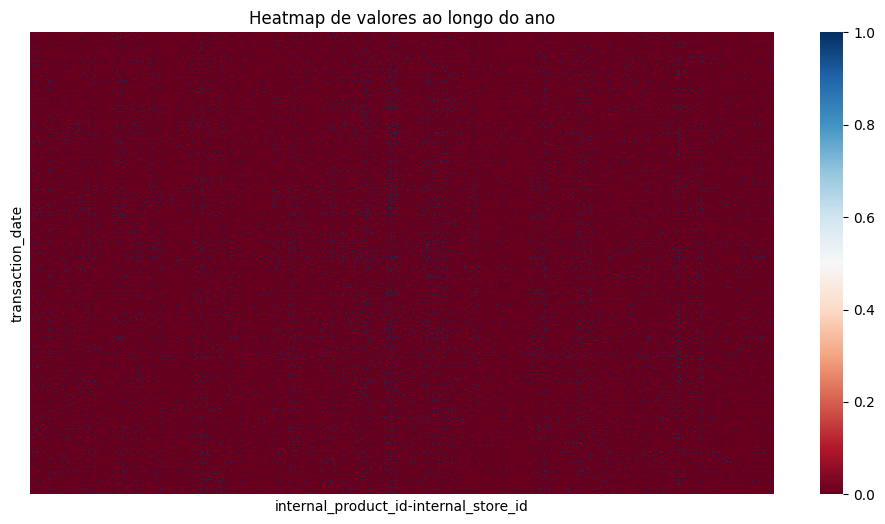

In [ ]:
# Código que recebe um dataframe e gera uma imagem de heatmap de 0 a 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from Modules.loading.read_parquet import get_file_paths, load_dataframes, lazy_load_clean_data, save_cleaned_data_path
# from Modules.preprocessing.onehot import one_hot_encode_parquet
from Modules.preprocessing.removing_categorical_tables import get_numerical_table
from Modules.preprocessing.removing_outliers import remove_outliers
from Modules.preprocessing.pivoting import pivoting_df

# 1. Carregar dataframe
FILE_PATHS = get_file_paths() # Setting up the constants

loaded_data = load_dataframes(FILE_PATHS) # Loading the data


numerical_table = get_numerical_table(loaded_data) # getting only the needed numerical data

pivoted_df = pivoting_df(numerical_table) # Pivoting the DataFrame
pivoted_df.info()

df = pivoted_df[pivoted_df.max().sort_values(ascending=False).index]

# 3. Filtrar número de colunas
df = df.iloc[:, 365*1200:365*1400]

# 3. Criar heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df, 
            cmap="RdBu",
              cbar=True, 
              xticklabels=False, 
              yticklabels=False,
              vmin=0, # Normalizando os valores entre 0 e 1
              vmax=1) # Normalizando os valores entre 0 e 1


plt.title("Heatmap de valores ao longo do ano")

# 4. Salvar como imagem
plt.savefig("heatmap_ano.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
pivoted_df.max().sort_values(ascending=False)


transaction_date
2022-09-11    94230
2022-12-27     2472
2022-10-26     2000
2022-12-23     1740
2022-12-21     1200
              ...  
2022-12-24       36
2022-03-19       36
2022-01-01       28
2022-05-07       24
2022-01-29       24
Length: 365, dtype: int64

---

In [ ]:
FILE_PATHS = get_file_paths() # Setting up the constants

loaded_data = load_dataframes(FILE_PATHS) # Loading the data